Importing Necessary Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Reading the Data

In [4]:
data=pd.read_csv(r"C:\Users\mahes\OneDrive\Desktop\Student_performance_data _.csv")

Basic Analysis of Data

In [6]:
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [8]:
data.shape

(2392, 15)

Statistical Analysis

In [10]:
data.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [11]:
#Checking for null values
data.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [12]:
#checking the datatypes
data.dtypes

StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object

In [13]:
#Removing Unnecessary Columns
data.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [14]:
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


EDA(EXPLORATORY DATA ANALYSIS)

Univariate Analysis

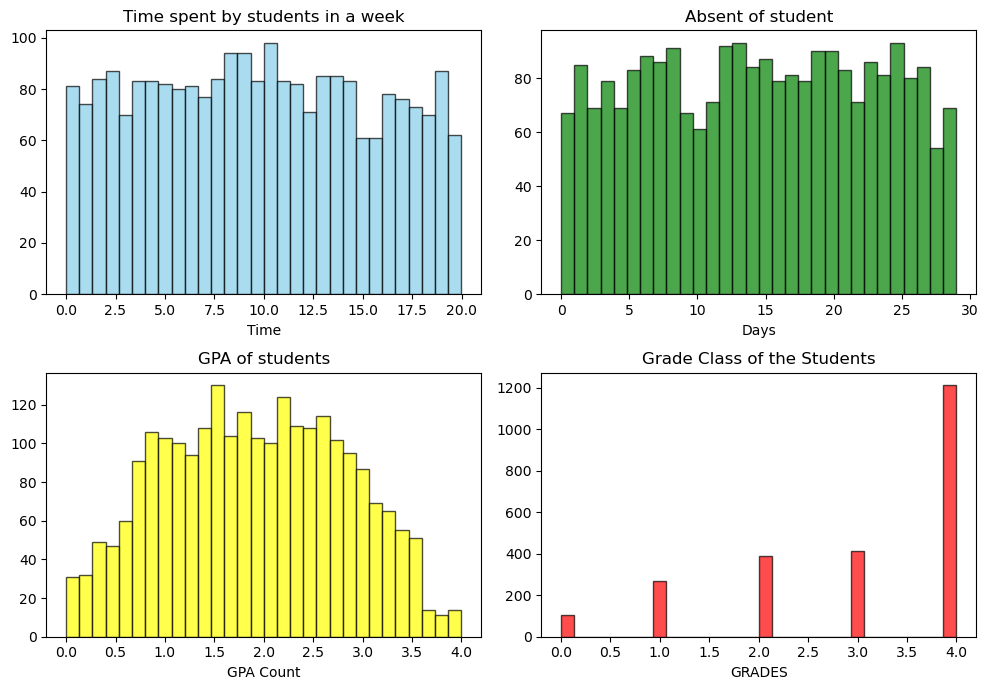

In [17]:
#Histograms
#StudyTime Weekly
plt.figure(figsize=(10,7))

plt.subplot(2,2,1)
plt.hist(data['StudyTimeWeekly'],color="skyblue", edgecolor='black',bins=30,alpha=0.7)
plt.title('Time spent by students in a week')
plt.xlabel('Time')

#Absences
plt.subplot(2,2,2)
plt.hist(data['Absences'],color="green", edgecolor='black',bins=30,alpha=0.7)
plt.title('Absent of student')
plt.xlabel('Days')

#GPA
plt.subplot(2,2,3)
plt.hist(data['GPA'],color="yellow", edgecolor='black',bins=30,alpha=0.7)
plt.title('GPA of students')
plt.xlabel('GPA Count')

#GPA
plt.subplot(2,2,4)
plt.hist(data['GradeClass'],color="red", edgecolor='black',bins=30,alpha=0.7)
plt.title('Grade Class of the Students')
plt.xlabel('GRADES')

plt.tight_layout()
plt.show()




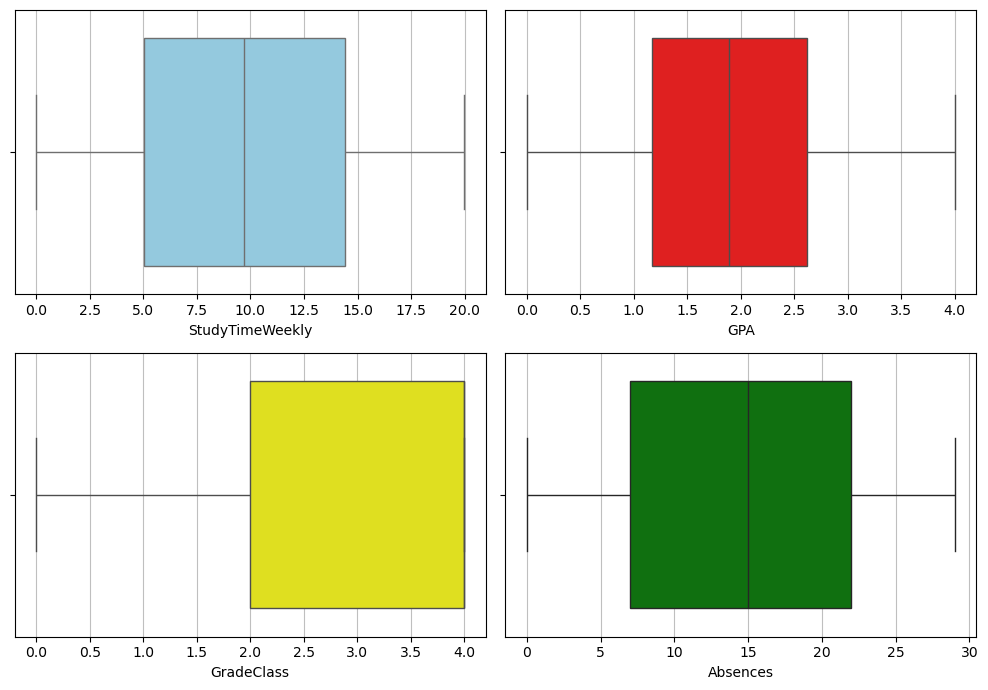

In [18]:
#BOX Plots
#Used to Detect Outliers

plt.figure(figsize=(10,7))

plt.subplot(2,2,1)
sns.boxplot(x=data['StudyTimeWeekly'],color='skyblue')
plt.grid(axis='x', alpha=0.8)

plt.subplot(2,2,2)
sns.boxplot(x=data['GPA'],color='red')
plt.grid(axis='x', alpha=0.8)

plt.subplot(2,2,3)
sns.boxplot(x=data['GradeClass'],color='yellow')
plt.grid(axis='x', alpha=0.8)

plt.subplot(2,2,4)
sns.boxplot(x=data['Absences'],color='green')
plt.grid(axis='x', alpha=0.8)

plt.tight_layout()
plt.show()

In [19]:
data.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

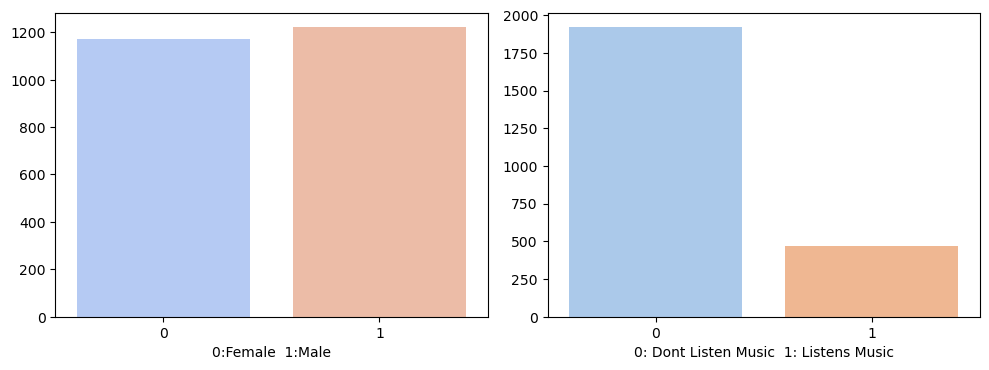

In [20]:
#Bar Charts
plt.figure(figsize=(10,7))

plt.subplot(2,2,1)
gender_counts=data['Gender'].value_counts()
sns.barplot(x=gender_counts.index,y=gender_counts.values, palette='coolwarm',hue=gender_counts.index,legend=False,dodge=False)
plt.xlabel("0:Female  1:Male")

plt.subplot(2,2,2)
Music=data['Music'].value_counts()
sns.barplot(x=Music.index, y=Music.values, palette='pastel', hue=Music.index, legend=False)
plt.xlabel("0: Dont Listen Music  1: Listens Music")

plt.tight_layout()
plt.show()

BIVARIATE ANALYSIS

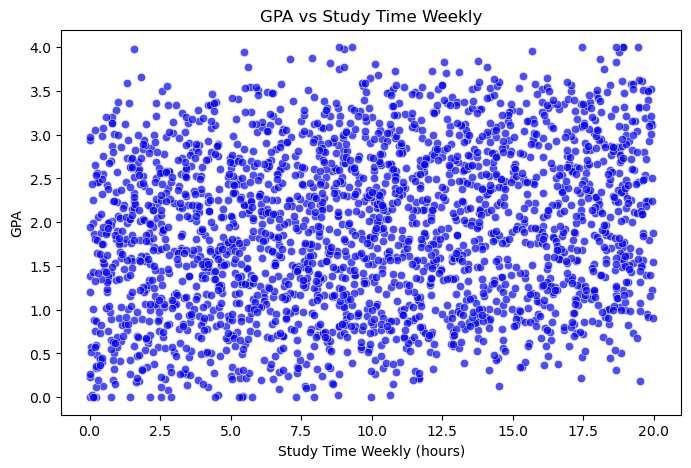

In [22]:

plt.figure(figsize=(8, 5))

sns.scatterplot(x='StudyTimeWeekly', y='GPA', data=data, color='blue', alpha=0.7)
plt.title('GPA vs Study Time Weekly')
plt.xlabel('Study Time Weekly (hours)')
plt.ylabel('GPA')
plt.show()



In [23]:
correlation_matrix=data.corr()
print(correlation_matrix)

                   StudentID       Age    Gender  Ethnicity  \
StudentID           1.000000 -0.042255 -0.014625  -0.012990   
Age                -0.042255  1.000000  0.044895  -0.028473   
Gender             -0.014625  0.044895  1.000000   0.016010   
Ethnicity          -0.012990 -0.028473  0.016010   1.000000   
ParentalEducation  -0.002307  0.025099  0.006771   0.033595   
StudyTimeWeekly     0.026976 -0.006800  0.011469   0.007184   
Absences            0.014841 -0.011511  0.021479  -0.025712   
Tutoring           -0.007834 -0.012076 -0.031597  -0.017440   
ParentalSupport     0.003016  0.033197  0.008065   0.020922   
Extracurricular    -0.003611 -0.025061 -0.005964  -0.008927   
Sports             -0.020703 -0.046320 -0.008897  -0.004484   
Music              -0.005468 -0.003492  0.007109  -0.014627   
Volunteering        0.008011  0.013074 -0.000200   0.013468   
GPA                -0.002697  0.000275 -0.013360   0.027760   
GradeClass         -0.098500 -0.006250  0.022998  -0.02

Text(0.5, 1.0, 'Correlation Heat Map')

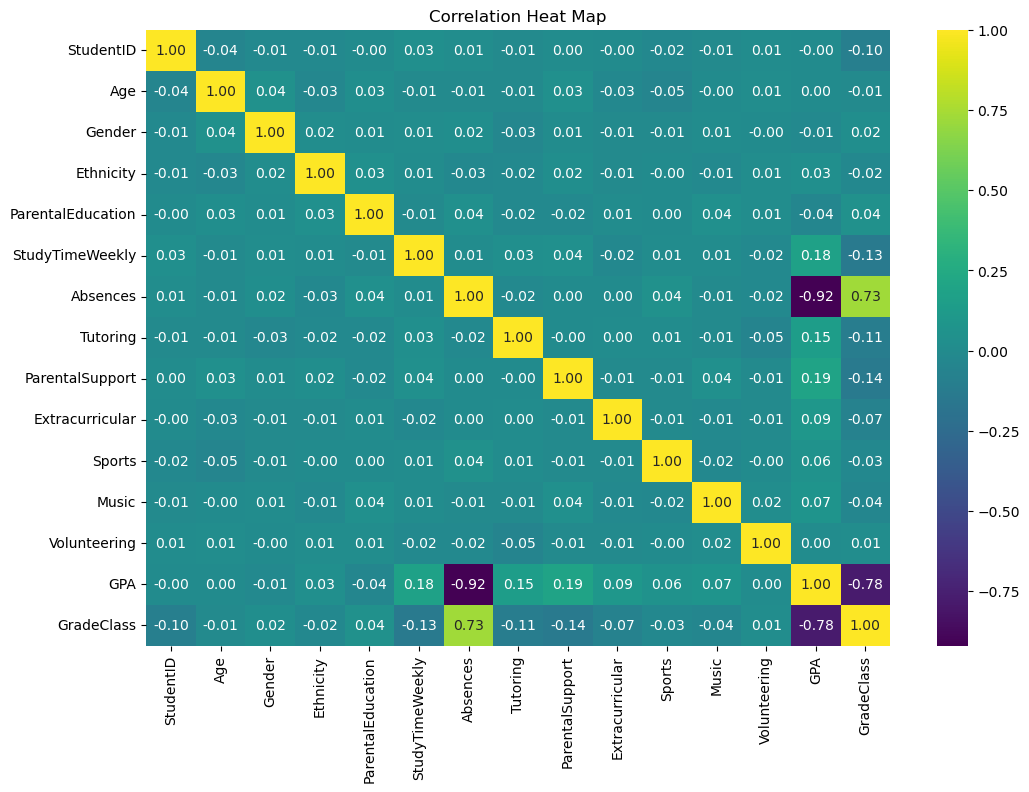

In [24]:
#Heat Map

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f',cmap='viridis')
plt.title("Correlation Heat Map")

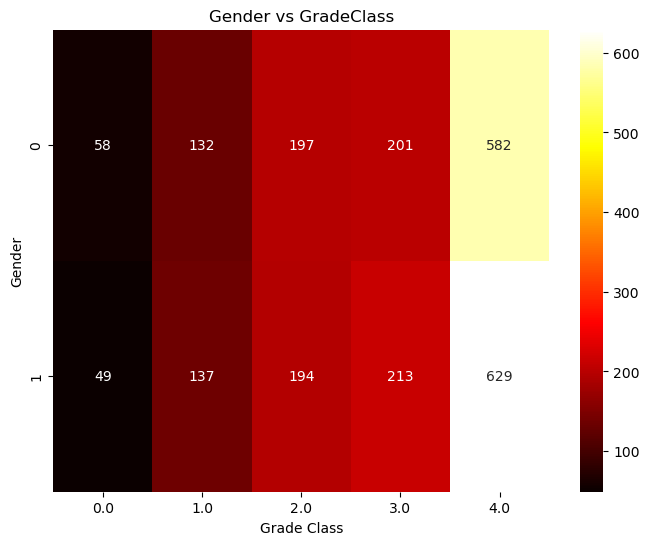

In [25]:
gender_grade_ct = pd.crosstab(data['Gender'], data['GradeClass'])

# Heatmap for categorical relationship
plt.figure(figsize=(8, 6))
sns.heatmap(gender_grade_ct, annot=True, cmap='hot', fmt='d')
plt.title('Gender vs GradeClass')
plt.xlabel('Grade Class')
plt.ylabel('Gender')
plt.show()

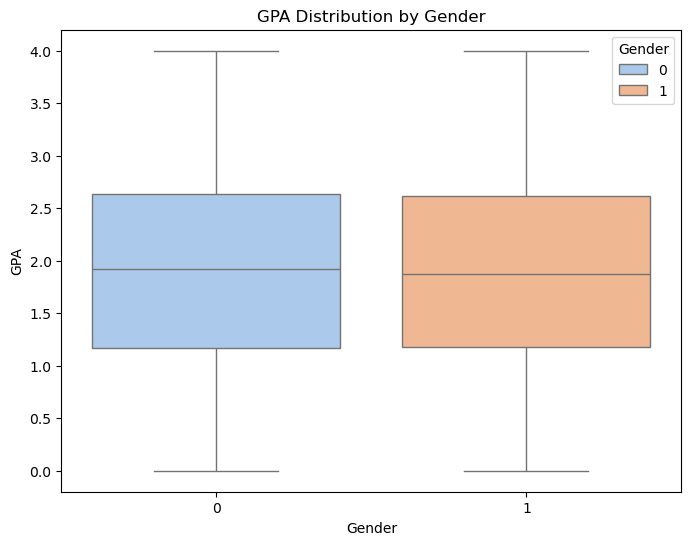

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='GPA', data=data, palette='pastel' ,hue='Gender')
plt.title('GPA Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('GPA')
plt.show()

In [27]:
numerical_data = data[['Age', 'StudyTimeWeekly', 'Absences', 'GPA', 'GradeClass']]

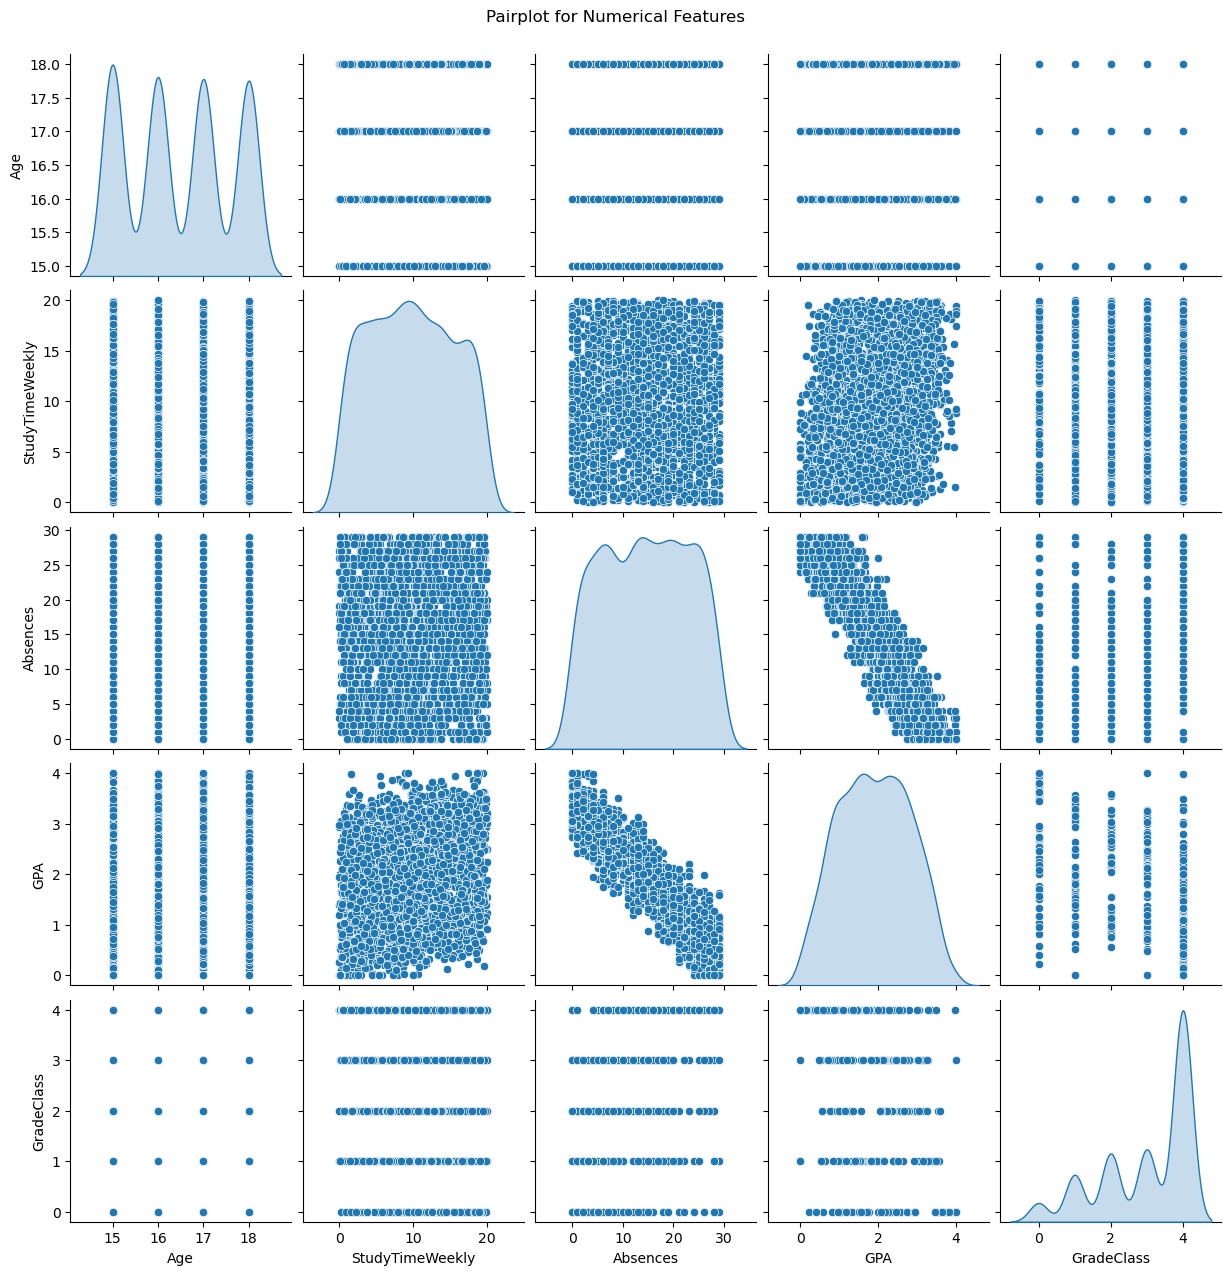

In [28]:
#Pair plots for Numerical Columns
sns.pairplot(numerical_data, diag_kind='kde')
plt.suptitle('Pairplot for Numerical Features', y=1.02)
plt.show()

SEPARATING FEATURES AND TARGET VARIABLE

In [30]:
data.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [31]:
x=data.drop(columns='GradeClass', axis=1)
y=data['GradeClass']
print(x)
print(y)

      StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0          1001   17       1          0                  2        19.833723   
1          1002   18       0          0                  1        15.408756   
2          1003   15       0          2                  3         4.210570   
3          1004   17       1          0                  3        10.028829   
4          1005   17       1          0                  2         4.672495   
...         ...  ...     ...        ...                ...              ...   
2387       3388   18       1          0                  3        10.680555   
2388       3389   17       0          0                  1         7.583217   
2389       3390   16       1          0                  2         6.805500   
2390       3391   16       1          1                  0        12.416653   
2391       3392   16       1          0                  2        17.819907   

      Absences  Tutoring  ParentalSupport  Extracur

Train Test Split

In [33]:
X_train, X_test, Y_train, Y_test=train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)
print(x.shape, X_train.shape, X_test.shape)

(2392, 14) (1913, 14) (479, 14)


Model Evolution

In [35]:
model1=LinearRegression()

In [36]:
model1.fit(X_train, Y_train)

LinearRegression()

In [37]:
#Mean square error and r2 score for the linear regression model
X_train_pred=model1.predict(X_train)
mse=mean_squared_error(X_train_pred, Y_train)
r2=r2_score(X_train_pred, Y_train)
print(mse)
print(r2)

0.5638665083515583
0.4124067996869212


In [38]:
#PredictinG with Decision Tree Model

from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor()

model2.fit(X_train, Y_train)



DecisionTreeRegressor()

In [39]:
Decision_pred=model2.predict(X_train)
Decision_mse=mean_squared_error(Decision_pred, Y_train)
Decision_r2=r2_score(Decision_pred, Y_train)
print("The Mean Square Error for the model is :",Decision_mse)
print("The Decision tree r2 score is :", Decision_r2)

The Mean Square Error for the model is : 0.0
The Decision tree r2 score is : 1.0


Building a Predictive System

In [73]:
input=(1012,17,0,0,1,7.59848581924029,15,0,2,0,0,0,1,1.5595945190402773)

input_as_numpy_array=np.asarray(input)

input_data_reshaped=input_as_numpy_array.reshape(-1,14)


predictions=model2.predict(input_data_reshaped)
print(f"The predicted GPA is: {predictions[0]:.1f}")

import warnings
warnings.filterwarnings('ignore')

The predicted GPA is: 4.0
